In [3]:
import random

from   keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from   PIL import Image, ImageDraw, ImageFont
import tensorflow as tf
from   tensorflow.keras.datasets import fashion_mnist
from   tensorflow.keras.layers import (
    Dense, Dropout, Flatten, Input, Lambda)
from   tensorflow.keras.models import Model
from   tensorflow.keras.optimizers import RMSprop
from   tensorflow.python.keras.utils.vis_utils import plot_model

In [8]:
def create_pairs(x, digit_inds, n_classes=10):
    '''
    Positive and negative pair creation.  Alternates between +/- pairs.
    '''
    pairs = []
    labels = []
    n = min([len(digit_inds[d]) for d in range(n_classes)]) - 1
    for d in range(n_classes):
        for i in range(n):
            z1, z2 = digit_inds[d][i], digit_inds[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            inc = random.randrange(1, n_classes)
            dn = (d + inc) % n_classes
            z2 = digit_inds[dn][i]
            pairs += [[x[z1], x[z2]]]
            labels += [1, 0]
    return np.array(pairs), np.array(labels)

In [15]:
def create_pairs_on_set(images, labels, n_classes=10):
    digit_inds = [np.where(labels == i)[0] for i in range(n_classes)]
    pairs, y = create_pairs(images, digit_inds)
    y = y.astype('float32')
    return pairs, y

In [10]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist\
    .load_data()

In [13]:
def prep_data(images, labels):
    images = images.astype('float32')
    images = images / 255.
    pairs, y = create_pairs_on_set(images, labels)
    return images, pairs, y

In [16]:
train_images, tr_pairs, tr_y = prep_data(train_images, train_labels)
test_images, ts_pairs, ts_y = prep_data(test_images, test_labels)

In [19]:
def show_image(img):
    plt.figure()
    plt.imshow(img)
    plt.colorbar()
    plt.grid(False)
    plt.show()

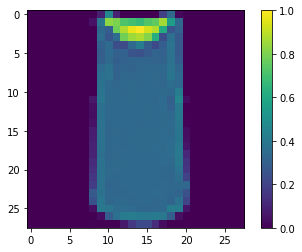

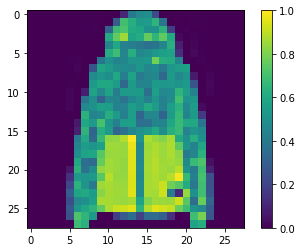

0.0


In [20]:
this_pair = 3
show_image(tr_pairs[this_pair][0])
show_image(tr_pairs[this_pair][1])
print(tr_y[this_pair])

In [26]:
def init_base_network(
        inshape=(28, 28), n_dense=3, dense_nodes=128, dropout=0.1):
    input = Input(shape=inshape, name='base_input')
    x = Flatten(name='flat')(input)
    for i in range(n_dense):
        x = Dense(dense_nodes, activation='relu', name=f'd{i + 1}')(x)
        x = Dropout(dropout, name=f'dropout{i + 1}')(x)
    return Model(inputs=input, outputs=x)

In [27]:
def get_euclidean_distance(vs):
    x, y = vs
    ss = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(ss, K.epsilon))

In [28]:
def get_eucl_dist_output_shape(shapes):
    s1, s2 = shapes
    return (s1[0], 1)

In [29]:
base_network = init_base_network()

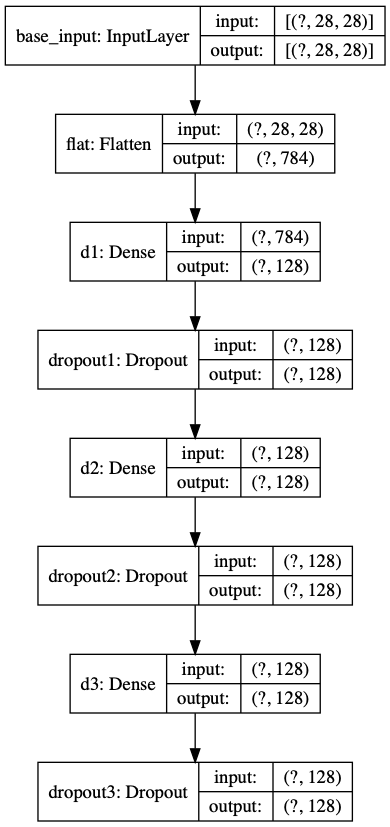

In [30]:
plot_model(base_network, show_shapes=True, show_layer_names=True)

In [31]:
# 2:54